# Phase_vocoder

Требуется реализовать алгоритм phase_vocoder по статье: http://www.guitarpitchshifter.com/algorithm.html\
Алгоритм предназначен для растягивания по времени цифрового аудио-сигнала без изменения питча.\
Язык реализации: Python или C++.\
При помощи реализованного алгоритма требуется растянуть в 2 раза и сжать в 2 раза (по длительности) прилагаемую аудиозапись.\
При реализации алгоритма допускается использовать библиотечные функции для чтения wav-файлов, прямого и обратного преобразования фурье.<p>

Проверка будет проходить следующим образом:\
`cd solution && ./run.sh <input.wav> <output.wav> <time_stretch_ratio>`\
где:\
<input.wav> -- путь для исходного wav файла\
<output.wav> -- путь до файла, который является результатом работы программы\
<time_stretch_ratio> -- параметр `r` алгоритма. (0 < r < 1 - сжимаем, 1 <= r - растягиваем)


In [35]:
from scipy.io import wavfile
from os.path import dirname, join as pjoin
import scipy.io
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

In [2]:
WAV_NAME = 'test_mono.wav'
SHIFT = 1.25

In [29]:
def plot_wav_freq(samplerate: int, data: np.ndarray) -> None:
    """
    ### Отрисовывает график частоты и громкости аудиодорожки
    """
    length = data.shape[0] / samplerate
    track_count = 0
    time = np.linspace(0., length, data.shape[0])

    fig = plt.figure()
    fig.set_size_inches(20, 8)
    
    try:        
        ax1 = plt.subplot(2, 1, 1)
        plt.plot(time, data[:, 0], label="Left channel")
        
        ax2 = plt.subplot(2, 1, 2)
        plt.plot(time, data[:, 1], label="Right channel")
        
        track_count = 2
        
    except IndexError:
        plt.plot(time, data[:], label="Main channel")
        
        track_count = 1
    
    print(f'Длина аудио - {length:.3f}s\nЧисло дорожек - {track_count}')
    print(f'Частота дискретизации - {samplerate} Гц')
        
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    plt.show()

Длина аудио - 16.797s
Число дорожек - 1
Частота дискретизации - 16000 Гц


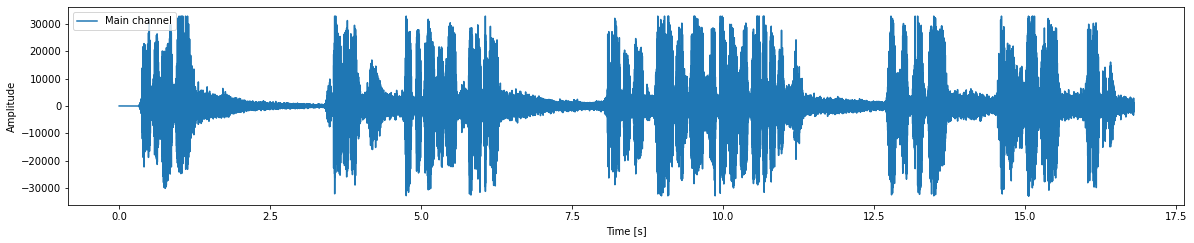

In [30]:
samplerate, data = wavfile.read(f'./input/{WAV_NAME}')
plot_wav_freq(samplerate=samplerate, data=data)

In [97]:
from scipy.fft import fft
from scipy.signal.windows import hann

def analysis(data: np.ndarray, frames: int = 1000, overlap: float = 0.75):
    """
    data: np.ndarray - изначальные значения аудио-сигнала
    
    frames: int - количество фреймов разбиения (default: 1000)
    
    overlap: float - процент перекрытия сегментов (default=0.75)
    """
    spectrum_list = []
    n_samples = data.shape[0] // frames
    
    for i in range(frames):
        x = data[i*n_samples:i*n_samples+n_samples]
        fast_fourier_transform = fft(x)  # fft frame
        hann_window = hann(n_samples)    # hann frame
        
        spectrum_list.append(fast_fourier_transform * hann_window * x)
        
    return spectrum_list
    
spectrum = analysis(data=data)

d:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


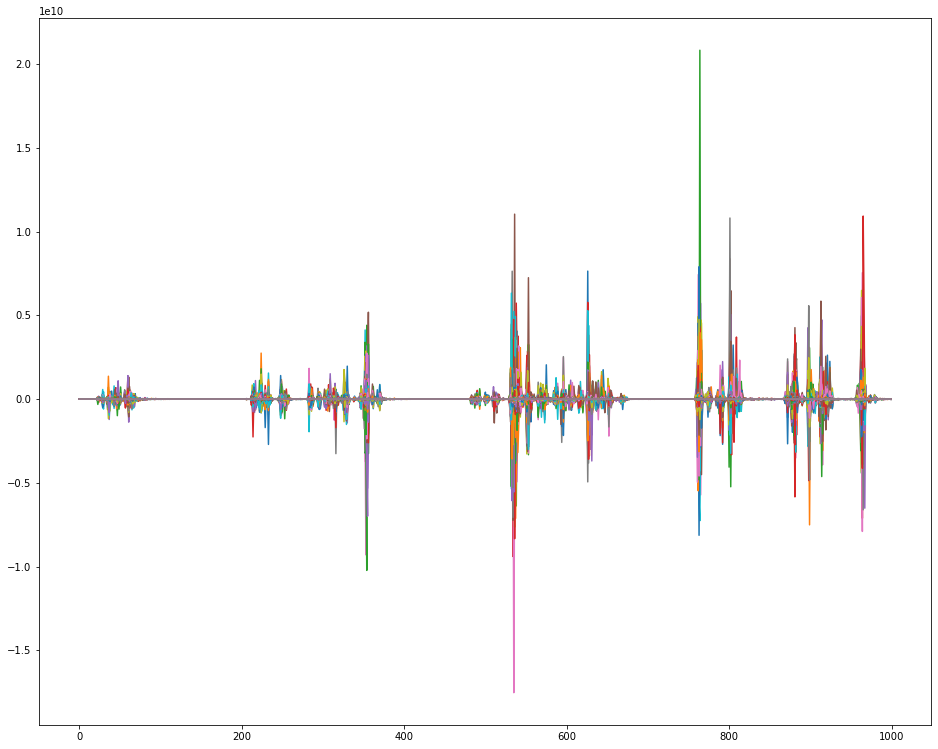

In [99]:
fig = plt.figure()
fig.set_size_inches(16, 13)
plt.plot(spectrum)
plt.show()

Длина аудио - 1.562s
Число дорожек - 1
Частота дискретизации - 16000 Гц


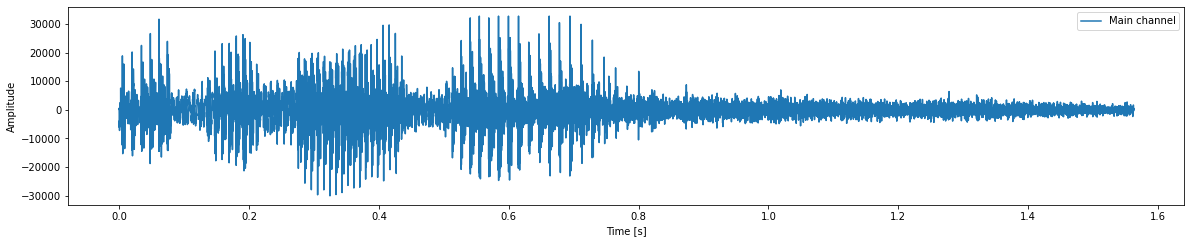

In [37]:
wavfile.write(f'.\output\{WAV_NAME[:-4]}_output.wav', int(samplerate * SHIFT), t)
sr, dt = wavfile.read(f'./output/{WAV_NAME[:-4]}_output.wav')

plot_wav_freq(samplerate=sr, data=dt)